In [1]:
!mkdir -p ~/aiffel/fnguide/data
!cp -r ~/data/* ~/aiffel/fnguide/data

# Package Import

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Data Loading

<AxesSubplot:xlabel='time'>

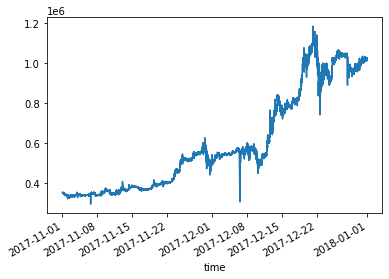

In [3]:
DATA_PATH = '/aiffel/aiffel/fnguide/data/'
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

# Data Labeling

Price Change Direction
Using Moving Average
Local Min-Max
Trend Scanning

Price Change Direction
Í∞ÄÏû• Îã®ÏàúÌïú Î∞©ÏãùÏúºÎ°ú ÌòÑÏû¨ Í∞ÄÍ≤©Í≥º ÌäπÏ†ï ÏòÅÏóÖÏùº Ïù¥Ï†ÑÏùò Í∞ÄÍ≤©Ïùò Ï∞®Ïù¥Î°ú Labeling ÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§. Í∞ÑÎã®Ìûà LabelingÌï† Ïàò ÏûàÏúºÎÇò, Î©∞Ïπ† Ï†Ñ Í∞ÄÍ≤©Í≥º ÎπÑÍµêÌï† Í≤ÉÏù∏ÏßÄÏóê Îî∞Îùº Î≥ÄÎèôÏù¥ Ïª§Ïßà Ïàò ÏûàÏñ¥, ÏÑ∏Ïã¨Ìïú Ï£ºÏùòÍ∞Ä ÌïÑÏöîÌï©ÎãàÎã§.

In [4]:
window = 10
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

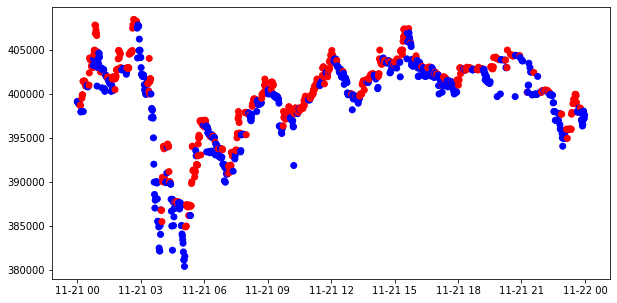

In [5]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = s_momentum_signal.loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

Using Moving Average
Í∏∞Ïà†Ï†Å ÏßÄÌëúÎ•º Ïù¥Ïö©ÌïòÏó¨ LabelingÌïòÎäî Î∞©ÏãùÏùÄ Ïó¨Îü¨ Í∞ÄÏßÄÍ∞Ä ÏûàÏúºÎÇò, Ïó¨Í∏∞ÏóêÏÑúÎäî Ïù¥ÎèôÌèâÍ∑†ÏÑ†ÏùÑ Ïù¥Ïö©Ìïú Î∞©ÏãùÎßå Í∞ÑÎûµÌûà ÏÜåÍ∞úÌïòÍ≥† ÎÑòÏñ¥Í∞ÄÍ≤†ÏäµÎãàÎã§. ÌòÑÏû¨Ïùò Ï£ºÍ∞ÄÍ∞Ä ÌäπÏ†ï Ïù¥ÎèôÌèâÍ∑†ÏÑ† ÏúÑÏóê ÏûàÎäîÏßÄ, ÏïÑÎûòÏóê ÏûàÎäîÏßÄ Ïó¨Î∂ÄÎ°ú LabelingÏùÑ ÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§. Í∞ÑÎã®Ìûà LabelingÌï† Ïàò ÏûàÏúºÎÇò, Í∞ÄÍ≤© Ï∞®Ïù¥ÎßåÏúºÎ°ú LabelingÌï† Í≤ΩÏö∞ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, Ïù¥ÎèôÌèâÍ∑†ÏùÑ Î©∞Ïπ†Î°ú Ìï† Í≤ÉÏù¥ÎÉêÎ•º Í≤∞Ï†ïÌïòÏó¨Ïïº ÌïòÍ≥†, Ïù¥ÎèôÌèâÍ∑†ÏúºÎ°ú Ïù∏Ìï¥ Lag(ÏßÄÏó∞)Í∞Ä Î∞úÏÉùÌïòÍ≤å Îê©ÎãàÎã§.

In [6]:
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

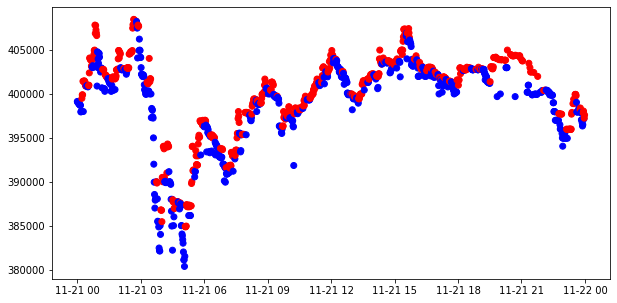

In [7]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = s_momentum_signal.loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

Local Min-Max
Ïù¥ Î∞©ÏãùÏùÄ Íµ≠ÏßÄÏ†ÅÏù∏ ÏµúÏÜå / ÏµúÎåÄÍ∞íÏùÑ Í≥ÑÏÜç Í∞±Ïã†ÌïòÏó¨, ÏµúÏÜå-ÏµúÎåÄ Íµ¨Í∞ÑÏùÑ Ïù¥Ïñ¥ÎÇòÍ∞ÄÎ©∞ LabelingÌïòÎäî Î∞©ÏãùÏûÖÎãàÎã§.
Ïó¨Í∏∞ÏÑú ÏÜåÍ∞úÌïòÎäî ÏïåÍ≥†Î¶¨Ï¶òÎßåÏù¥ Ï†ïÎãµÏùÄ ÏïÑÎãàÎ©∞, Íµ≠ÏßÄÏ†Å ÏµúÏÜå ÏµúÎåÄÎ•º Í∞±Ïã†Ìï† Ïàò ÏûàÎäî Ïó¨Îü¨ Î∞©Î≤ïÏù¥ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
ÌòÑ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ Í≥ÑÏÜçÌï¥ÏÑú ÏµúÏÜå, ÏµúÎåÄÍ∞íÏùÑ Í∞±Ïã†ÌïòÎã§Í∞Ä, ÏÑúÎ°ú ÏÉÅÎåÄÎ∞©Í∞íÏúºÎ°ú Ï¥àÍ∏∞ÌôîÌï¥ Ï£ºÎäî Í≤ÉÏù¥ ÌïµÏã¨ÏûÖÎãàÎã§.

ÏòàÎ•º Îì§Ïñ¥, ÌòÑÏû¨ ÌïòÎùΩÍµ¨Í∞ÑÏù¥Ïñ¥ÏÑú ÏµúÏÜåÍ∞íÏù¥ Í≥ÑÏÜç Í∞±Ïã†ÎêòÍ≥† ÏûàÎã§Í≥† Í∞ÄÏ†ïÌï¥ Î¥ÖÏãúÎã§. Ïù¥Ï†Ñ ÏµúÎåÄÍ∞íÏùÄ 3,000ÏõêÏù¥Í≥†, ÏßÅÏ†ÑÍπåÏßÄ ÏµúÏÜåÍ∞íÏùÄ 2,800ÏõêÏù∏Îç∞, ÌòÑÏû¨Í∞ÄÍ≤©Ïù¥ 2,750ÏõêÏúºÎ°ú Îçî ÎÇÆÏïÑÏ°åÎã§Î©¥, ÏµúÏÜåÍ∞íÏù¥ Í∞±Ïã†Îê©ÎãàÎã§. Ïù¥Ïñ¥ÏÑú, Îã§Ïùå Í∞ÄÍ≤©Ïù¥ 2,800ÏõêÏúºÎ°ú ÏÉÅÏäπÏùÑ ÏãúÏûëÌñàÎã§Î©¥, ÌòÑÏû¨ ÌïòÎùΩÍµ¨Í∞ÑÏùÄ Ï¢ÖÎ£åÎêòÏóàÎã§Îäî Í∞ÄÏ†ïÌïòÏóê ÏµúÏÜåÍ∞í Í∞±Ïã†ÏùÑ Î©àÏ∂îÍ≥† Ïù¥Ï†Ñ ÏµúÎåÄÍ∞íÏùÑ ÌòÑÏû¨ ÏµúÏÜåÍ∞íÏù∏ 2,750ÏõêÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥ Ï£ºÏñ¥ ÏïûÏúºÎ°ú ÏÉÅÏäπÍµ¨Í∞ÑÏóêÏÑú ÏµúÎåÄÍ∞í Í∞±Ïã†Ïù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù Ï°∞Ï†ïÌï©ÎãàÎã§.
Ïó¨Í∏∞ÏÑú, ÌòÑÏû¨Í∞ÄÍ≤©Ïù¥ ÌïúÎ≤à ÏÉÅÏäπÌñàÎã§Í≥† Î∞îÎ°ú ÌïòÎùΩÍµ¨Í∞Ñ Ï¢ÖÎ£åÎ•º Í∞ÄÏ†ïÌïòÎ©¥, ÎπàÎ≤àÌïú LabelingÏùò Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏúºÎØÄÎ°ú, Ï¢Ä Îçî Î≥ÄÎèôÏù¥ Ï†ÅÏùÄ ÏûëÏóÖÏùÑ ÏúÑÌï¥ Wait Í≥ÑÏàòÎ•º ÏÑ§Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§. ÏÉÅÏäπÍµ¨Í∞ÑÏóêÏÑúÏùò Í≥ºÏ†ïÎèÑ ÌïòÎùΩÍµ¨Í∞ÑÍ≥º ÎèôÏùºÌï©ÎãàÎã§.

Ïù¥ Î∞©ÏãùÏùÄ ÏàúÏ∞®Ï†Å Í∞ÄÍ≤© ÌôïÏù∏Ïù¥ ÏöîÍµ¨ÎêòÎäî ÎßåÌÅº Îç∞Ïù¥ÌÑ∞Í∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥, ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Ïó∞ÏÇ∞ÏãúÍ∞ÑÎèÑ ÎäòÏñ¥ÎÇòÎäî Îã®Ï†êÏù¥ ÏûàÏäµÎãàÎã§. ÎòêÌïú, ÏïûÏÑ† Î∞©ÏãùÎì§Í≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Wait Í≥ÑÏàòÎ•º ÏûëÍ≤åÌïòÎ©¥ Î≥ÄÎèôÏÑ±Ïù¥ Ïª§Ïßà Ïàò ÏûàÏúºÎØÄÎ°ú, Ïã†Ï§ëÌïú Í≥ÑÏàòÏÑ†ÌÉùÏù¥ ÏöîÍµ¨Îê©ÎãàÎã§.

In [8]:
# Local min / max Î•º Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0
    
    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False
    
    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            max_value = val
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            b_max_update = True
        
        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0
    
        if not b_min_update:
            b_max_update = False
            n_cnt_max += 1
            if n_cnt_max >= wait:
                min_value = max_value
                n_cnt_max = 0
               
    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

In [10]:
mins, maxes = get_local_min_max(sub_data, wait=3)

(376546.5, 412585.0)

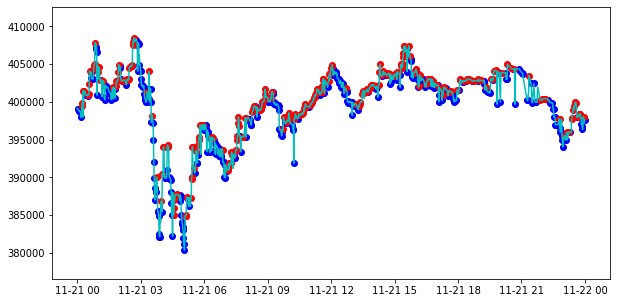

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data, 'c')
ax.scatter(mins.min_time, mins.local_min, c='blue')
ax.scatter(maxes.max_time, maxes.local_max, c='red')
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

(376546.5, 412585.0)

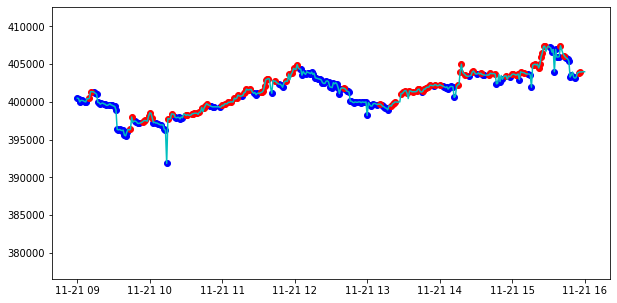

In [12]:
st_time, ed_time = '2017-11-21 09:00:00', '2017-11-21 16:00:00'

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data.loc[st_time:ed_time], 'c')
ax.scatter(mins.set_index('min_time', drop=False).min_time.loc[st_time:ed_time], mins.set_index('min_time').local_min.loc[st_time:ed_time], c='blue')
ax.scatter(maxes.set_index('max_time', drop=False).max_time.loc[st_time:ed_time], maxes.set_index('max_time').local_max.loc[st_time:ed_time], c='red')
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

In [13]:
mins.shape[0], maxes.shape[0]

(477, 273)

Trend Scanning
Trend ScanningÏùÄ Marcos Lopez de Prado Ïùò Ï†ÄÏÑú 'Machine Learning for Asset Managers'Ïóê ÏÜåÍ∞úÎêú Labeling Î∞©ÏãùÏûÖÎãàÎã§.
ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Xùë°Í∞Ä Ï£ºÏãù ÎòêÎäî ÏΩîÏù∏Ïùò Í∞ÄÍ≤©Ïù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï¥ Î¥ÖÏãúÎã§. ÌòÑÏû¨ ùë° ÏãúÏ†êÏóêÏÑú ùë°+ùëô ÏãúÏ†êÍπåÏßÄÏùò ÌöåÍ∑ÄÏãùÏùÑ FittingÌïòÏó¨, ùõΩ Í∞íÏùÑ Íµ¨Ìï©ÎãàÎã§. Ïù¥ ùõΩ Í∞íÏùò ùë°ùë£ùëéùëôùë¢ùëí Î•º Íµ¨Ìï©ÎãàÎã§. maxùë°ùë£ùëéùëôùë¢ùëí Ïùò Î∂ÄÌò∏Î•º ÌÜµÌï¥ LabelingÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

T-valueÎûÄ?
Îëê ÎåÄÏÉÅÏù¥ ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏñºÎßàÎÇò Ï∞®Ïù¥Í∞Ä ÎÇòÎäîÍ∞ÄÎ•º ÌëúÌòÑÌïú Ï†ïÎèÑÎ•º ÎÇòÌÉÄÎÇº Ïàò ÏûàÏäµÎãàÎã§. t-value Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù Îëê ÎåÄÏÉÅÏùò ÌèâÍ∑†Ïùò Ï∞®Ïù¥Îäî ÌÅ¨Îã§Í≥† Ìï† Ïàò ÏûàÏäµÎãàÎã§. t-valueÎäî Îëê ÎåÄÏÉÅÏùÑ 'ÌèâÍ∑†Ï†Å'ÏúºÎ°ú ÎπÑÍµêÌïòÍ≥† Ïã∂ÏùÑ Îïå ÏÇ¨Ïö©Ìï©ÎãàÎã§. 
ÏòàÏãúÎ°ú ÎÇ¥Í∞Ä ÏÑ∏Ïö¥ Í∞ÄÏÑ§Î°ú Í≥ÑÏÇ∞Ìïú Ï£ºÍ∞ÄÏôÄ Ïã§Ï†ú Ï£ºÍ∞ÄÎäî ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå? Í∞ÄÏÑ§Î°ú Íµ¨Ìïú Ï£ºÍ∞ÄÏôÄ Ïã§Ï†ú Ï£ºÍ∞ÄÏùò t-valueÍ∞Ä 0ÏóêÏÑú Î©ÄÎã§Î©¥ Í∞ÄÏÑ§Î°ú Íµ¨Ìïú Ï£ºÍ∞ÄÏôÄ Ïã§Ï†ú Ï£ºÍ∞ÄÎäî Ï∞®Ïù¥Í∞Ä ÌÅ¨Îã§Í≥† ÎπÑÍµêÌï¥ Î≥º Ïàò ÏûàÏäµÎãàÎã§.

In [14]:
def t_val_lin_r(close):
    import statsmodels.api as sml
    
    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

In [15]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [16]:
# Ïù¥ ÏΩîÎìú Î∏îÎü≠ÏùÄ Ïã§ÌñâÏóê 20~30Î∂ÑÏ†ïÎèÑ Í±∏Î¶ΩÎãàÎã§.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # Ï†ÑÎ∞© ÌÉêÏÉâÏùÑ ÏúÑÌïú ÏÉòÌîå Ï∂îÏ∂ú
    if look_forward_window > subset.shape[0]:
        continue
    
    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌÜµÌï¥ t ÌÜµÍ≥ÑÎüâÍ∞íÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï∂îÏÑ∏ Ï∂îÏ†ï
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        tval.append(t_val_lin_r(df.values))
    
    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 33384/33384 [13:34<00:00, 40.97it/s]


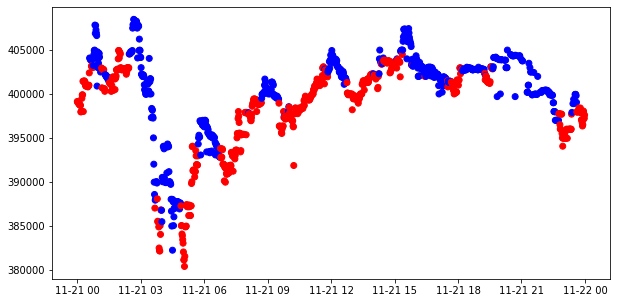

In [17]:
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values,
              c=c_sig['color'])